# Best-Practices Handbook - Non-Stationary

### Description

Non-stationary data refers to time series data that experience changes with time. Often this affects the distribution's mean, variance, and covariance, which can all be affected by certain trends or cycles, e.g. seasonality (Iordanova, 2022). For data analysis that include multiple timeseries, e.g. to calculate the historical correlation of two assets over the last month, relationship (here correlation) tends to change over time as well. 

### Definition

From a technical perspective, non-stationary data includes a time dependent element, expressed by `t` that accompanies the variables in the regular formulas for the distribution describing statistics. The equations for mean and variance are below:

$$
\mathbb{E}[X_t] = \mu_t
$$

$$
\text{Var}(X_t) = \sigma_t^2
$$

### Demonstration & Diagram

To demonstrate the changes of data with time, we can look at the moving average of a timeseries. If data was stationary, the moving average would be constant. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [3]:
data1 = pd.read_csv('london1.csv', parse_dates=True, index_col='datetime')
data2 = pd.read_csv('london2.csv', parse_dates=True, index_col='datetime')
weather = pd.concat([data1, data2])
weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2022-05-25 to 2024-05-24
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              731 non-null    object 
 1   tempmax           731 non-null    float64
 2   tempmin           731 non-null    float64
 3   temp              731 non-null    float64
 4   feelslikemax      731 non-null    float64
 5   feelslikemin      731 non-null    float64
 6   feelslike         731 non-null    float64
 7   dew               731 non-null    float64
 8   humidity          731 non-null    float64
 9   precip            731 non-null    float64
 10  precipprob        731 non-null    float64
 11  precipcover       731 non-null    float64
 12  preciptype        512 non-null    object 
 13  snow              731 non-null    float64
 14  snowdepth         731 non-null    float64
 15  windgust          731 non-null    float64
 16  windspeed         731 non

In [4]:
weather['moving_avg_7'] = weather['temp'].rolling(window=21).mean() #weekly average
weather['sample_mean'] = weather['temp'].mean()
weather.tail()

,name,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,...,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations,moving_avg_7,sample_mean
datetime,,,,,,,,,,,,,,,,,,,,,
2024-05-20,london,20.2,10.0,15.1,20.2,8.5,15.0,9.0,68.9,0.1,...,10,2024-05-20T05:01:15,2024-05-20T20:53:55,0.40,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"EGWU,EGLL,D5621,EGLC",15.057143,12.83803
2024-05-21,london,14.7,11.6,13.4,14.7,11.6,13.4,11.4,87.7,6.9,...,10,2024-05-21T04:59:59,2024-05-21T20:55:18,0.43,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"EGWU,EGLL,D5621,EGLC",15.042857,12.83803
2024-05-22,london,15.3,13.6,14.3,15.3,13.6,14.3,12.9,90.9,4.9,...,10,2024-05-22T04:58:45,2024-05-22T20:56:40,0.46,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"EGWU,EGLL,D5621,EGLC",15.023810,12.83803
2024-05-23,london,18.4,12.6,14.8,18.4,12.6,14.8,9.4,71.3,0.0,...,10,2024-05-23T04:57:34,2024-05-23T20:58:00,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"EGWU,EGLL,D5621,EGLC",15.095238,12.83803
2024-05-24,london,18.6,10.5,14.7,18.6,10.5,14.7,6.8,60.9,0.0,...,10,2024-05-24T04:56:25,2024-05-24T20:59:19,0.53,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"EGWU,EGLL,D5621,EGLC",15.276190,12.83803


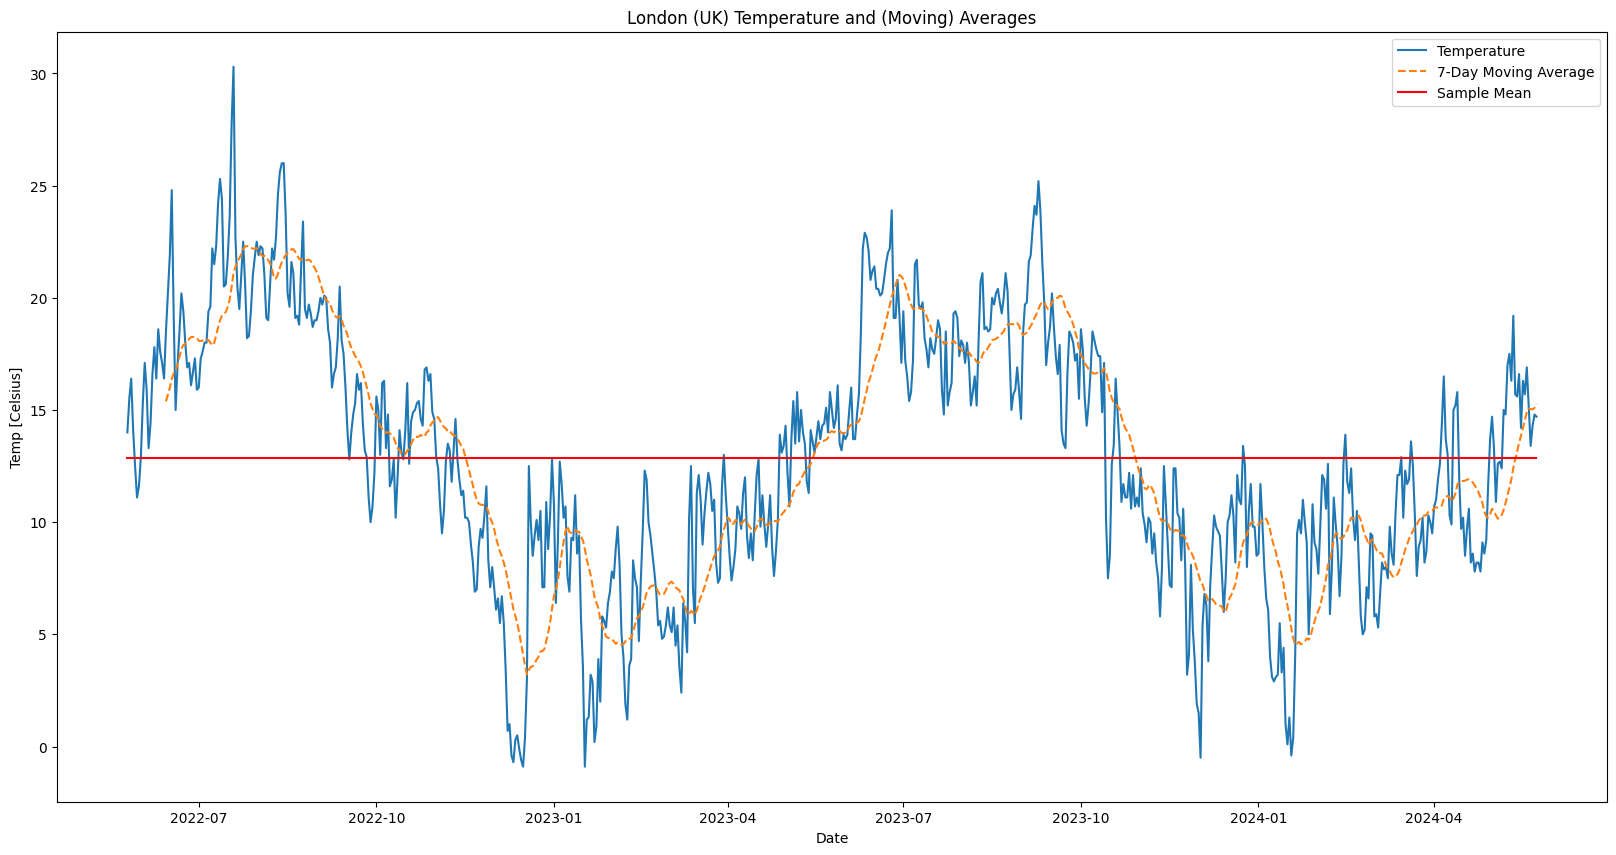

In [5]:
plt.figure(figsize=(20, 10))
plt.plot(weather['temp'], label='Temperature')
plt.plot(weather['moving_avg_7'], label='7-Day Moving Average', linestyle='--')
plt.plot(weather['sample_mean'], label='Sample Mean', c='red')
plt.title('London (UK) Temperature and (Moving) Averages')
plt.xlabel('Date')
plt.ylabel('Temp [Celsius]')
plt.legend()
plt.show()

### Diagnosis

The above graph shows that the average temperature in London fluctuates with time. Ths makes sense given London experiences all 4 seasons and Oct-Mar tend to be much colder than Apr-Sep. We see that the temperature depends on the time period selected as well as the lookback window. Plotting the moving averages against the sample mean clearly shows the fluctuation of the mean with time. Note that if a different sample length was selected, the mean would again be different as well. 

Although our dataset is limited to 1 year, we can observe seasonality in the above data. For such seasonal data, additional plots can be useful to determine seasonal decomposition, autocorrelation (ACF) or partial autocorrelation (PACF) (Tate, 2023). We'll look at seasonal decomposition below.

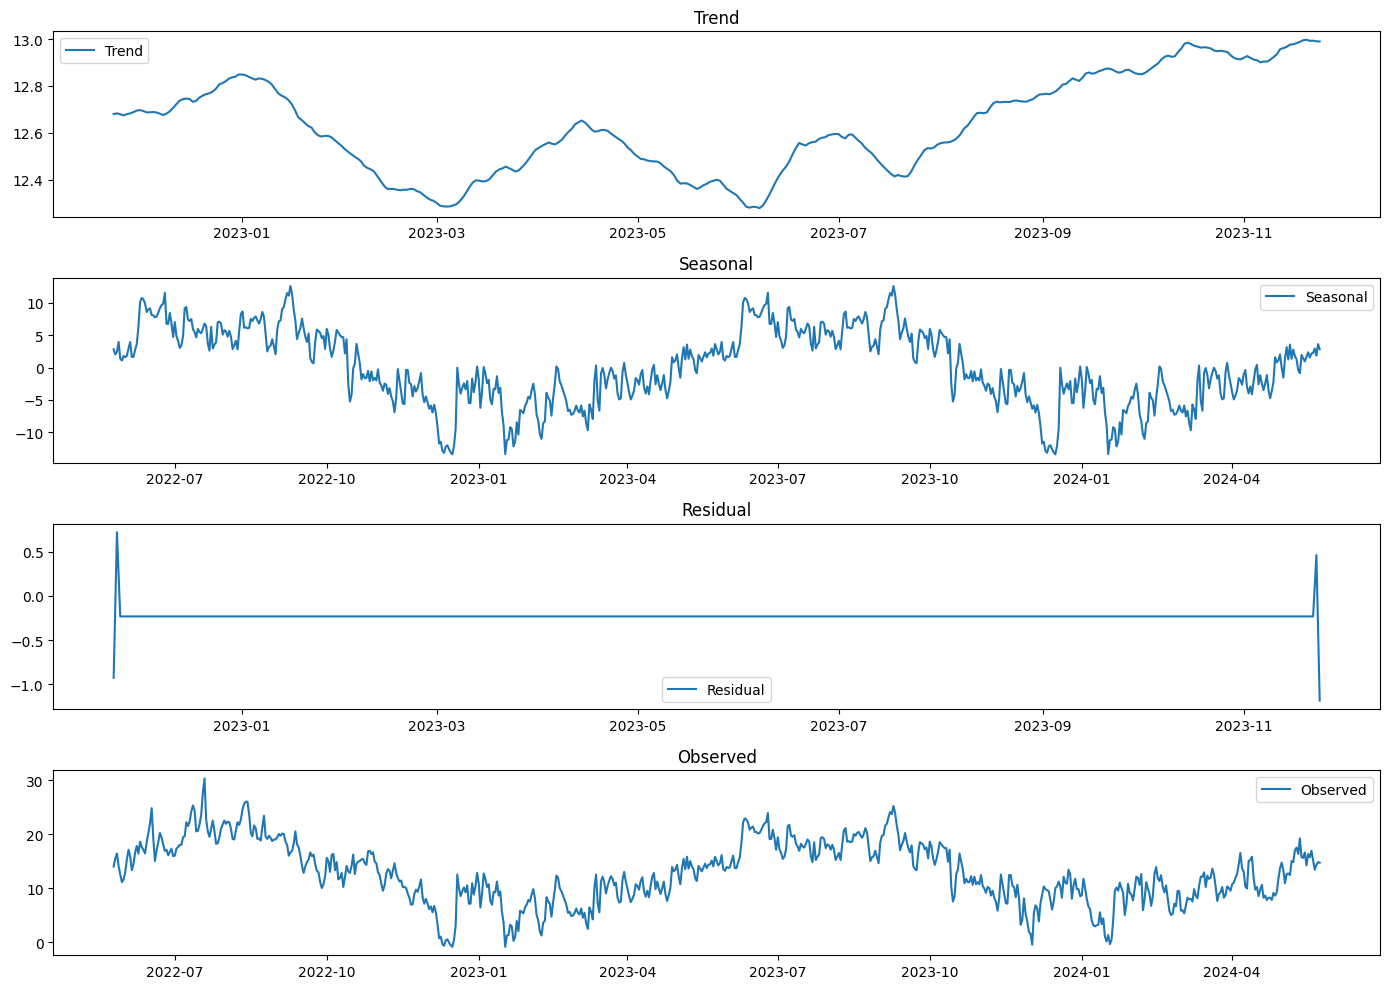

In [6]:
decomposition = seasonal_decompose(weather['temp'], model='additive', period=365)

plt.figure(figsize=(14, 10))
plt.subplot(411)
plt.plot(decomposition.trend, label='Trend')
plt.title('Trend')
plt.legend()
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.title('Seasonal')
plt.legend()
plt.subplot(413)
plt.plot(decomposition.resid, label='Residual')
plt.title('Residual')
plt.legend()
plt.subplot(414)
plt.plot(decomposition.observed, label='Observed')
plt.title('Observed')
plt.legend()
plt.tight_layout()
plt.show()

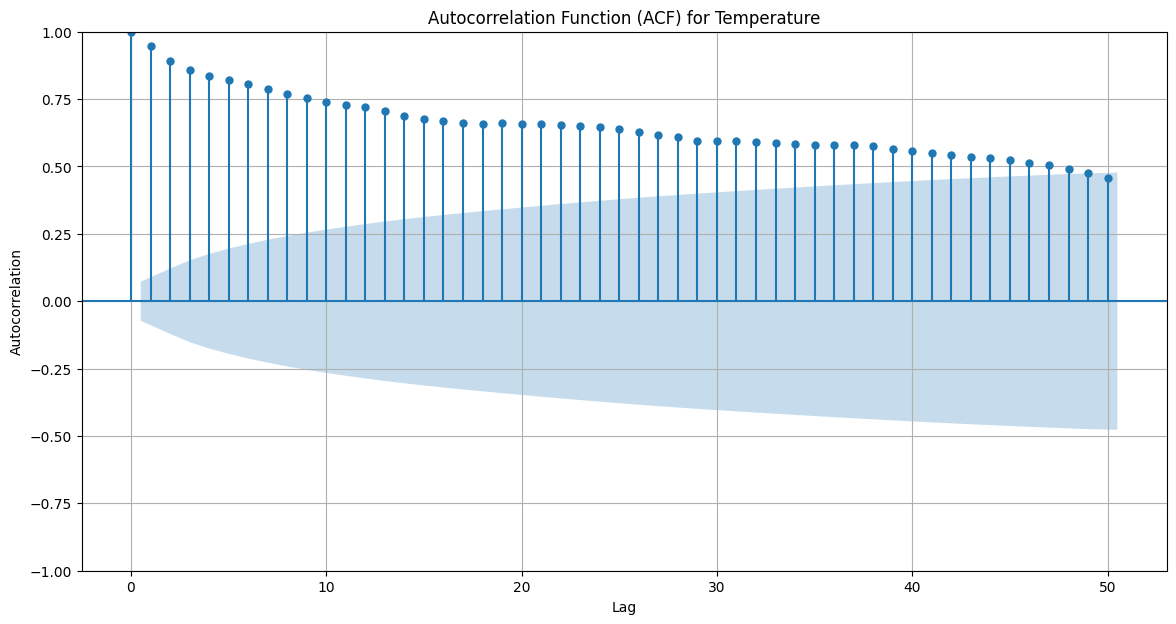

In [7]:
plt.figure(figsize=(14, 7))
plot_acf(weather['temp'], lags=50, ax=plt.gca())
plt.title('Autocorrelation Function (ACF) for Temperature')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

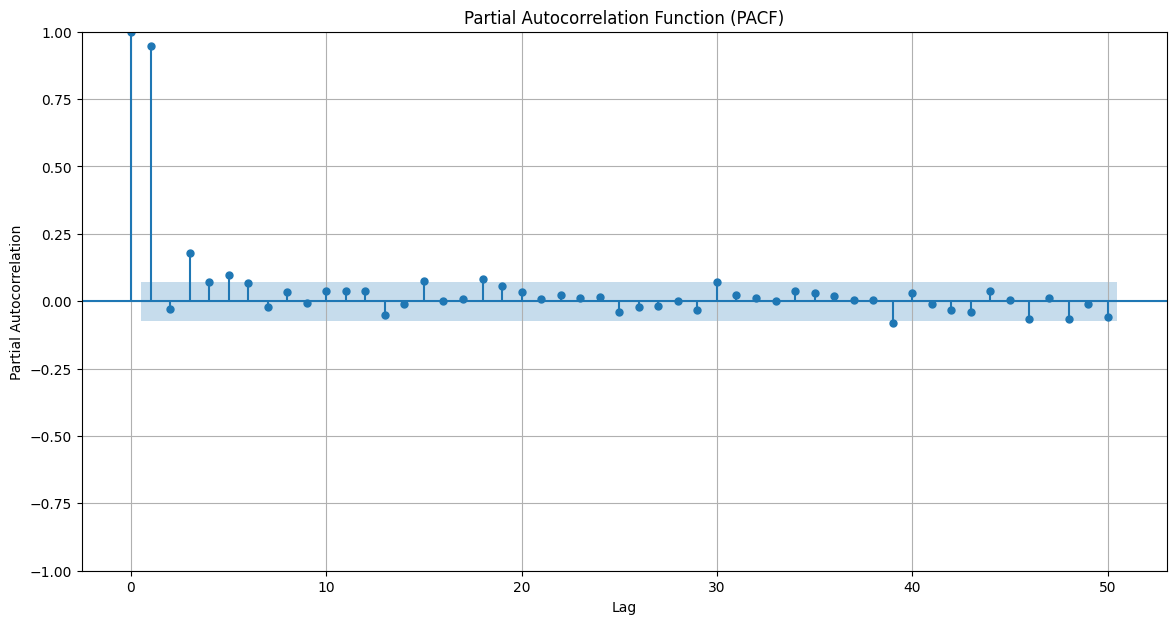

In [8]:
plt.figure(figsize=(14, 7))
plot_pacf(weather['temp'], lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.show()

Apart from the visual inspection, we can run the Augmented Dickey-Fuller (ADF) Test which helps us understand whether a time series is stationary (Tate, 2023). The test sets the null hypothesis that the data is non-stationary. If the calculated p-value is less than 0.05, we can reject the null hypothesis and assume the time series is static.

In [9]:
adf_result = adfuller(weather['temp'])
p_value = adf_result[1]
print(f'ADF p-value: {p_value:.4f}')

ADF p-value: 0.0512


As we can see, the p-value exceeds 0.05 (even if only slightly). Therefore, we cannot reject the null hypothesis and can conclude we are dealing with non-stationary data.

### Damage

The issue with non-stationary data is that stationary is a fundamental assumption for various time series models, including ARIMA (Tate, 2023). As with all statistical tools, if assumptions are violated, the model output is unreliable. Ultimately, non-stationarity makes it harder to model data and make confident predictions about future movements. Specifically trends can also cause issues with understanding relationships between independent variables because we need to determine whether they are affected by the same underlying affects, e.g. time of year, macro-economic events, etc.

### Directions

To ensure seasonality does not affect our forecast, it is crucial to separate the trend from the data by "detrending" the data (Gomede, 2023). After the deterministic trend, e.g. predictable monthly temperature fluctuations, is removed from the data, the data can be retested for stationarity. Detrending by differencing can be done and is considered a data transformation, simiarly to the ones discussed in dealing with skewed datasets. We can also detrend by fitting a model (Bobbit, 2021).

Detrending by differencing is the simplest way to detrend. It is done by creating a new dataset that contains values created by taking the difference between the observation and the previous observation. 

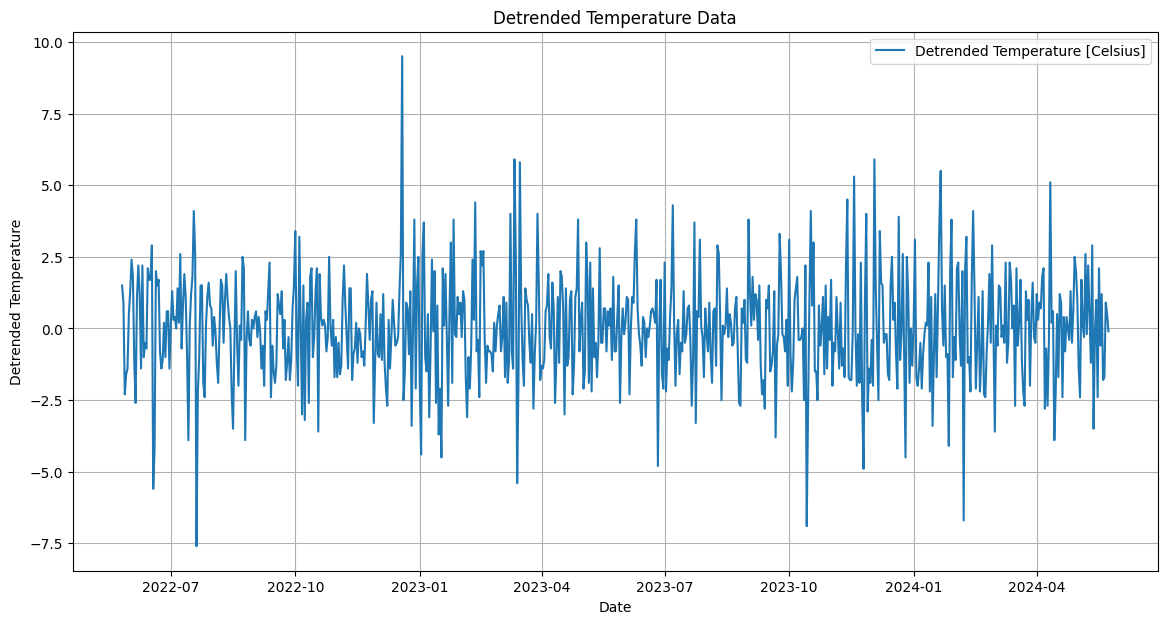

In [11]:
weather['detrended_temp'] = weather['temp'].diff()

plt.figure(figsize=(14, 7))
plt.plot(weather.index, weather['detrended_temp'], label='Detrended Temperature [Celsius]')
plt.title('Detrended Temperature Data')
plt.xlabel('Date')
plt.ylabel('Detrended Temperature')
plt.legend()
plt.grid(True)
plt.show()

When comparing this to our initial historic temperature graph, we can see that we no longer see the obvious cycles created by the 4 seasons in London. 

### References

1. Iordanova, Tzveta. "An Introduction to Processes.", 5 Jan. 2022, www.investopedia.com/articles/trading/07/stationary.asp. 
2. Tate, Andrew. "Understanding the Importance of Stationarity in Time Series.", 1 Dec. 2023, hex.tech/blog/stationarity-in-time-series/#:~:text=Non%2Dstationary%20data%20can%20lead,Easier%20modeling%20and%20forecasting. 
3. Gomede, Everton. "Forecasting Non-Stationary Time Series", 14 Oct. 2023, medium.com/@evertongomede/forecasting-non-stationary-time-series-03b638a7cd50.
4. Bobbit, Zach. "How to Detrend Data (With Examples).", 20 Jan. 2021, www.statology.org/detrend-data/.